# Donations Dataset

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/vihaan/Desktop/lab-revisiting-machine-learning/data_7.01_activities/files_for_activities/learningSet.csv')

In [3]:
data.shape

(95412, 481)

In [4]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [5]:
categoricals = data.select_dtypes(object)
categoricals

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [6]:
categoricals.isna().sum()  # one categorical column(GEOCODE2) has null values

OSOURCE       0
STATE         0
ZIP           0
MAILCODE      0
PVASTATE      0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 74, dtype: int64

In [7]:
cat_nulls = pd.DataFrame(categoricals.isna().sum()*100/len(data), columns=['percentage'])
cat_nulls.sort_values('percentage', ascending = False).head(5)
# checking categorical column null values in percentages

,percentage
GEOCODE2,0.138347
RFA_12,0.000000
RFA_10,0.000000
RFA_9,0.000000
RFA_8,0.000000


In [8]:
data['GEOCODE2'] = data['GEOCODE2'].replace(' ', 'A') 
# dealing the categorical null values with the highest value count

In [9]:
data['GEOCODE2'].value_counts()

A    34671
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

create a list to collect features that we want want to drop

In [10]:
drop_list = []

In [11]:
print('Amount of unique values in OSOURCE: ', len(data['OSOURCE'].unique())) 

Amount of unique values in OSOURCE:  896


In [12]:
print('Amount of unique values in ZIP: ', len(data['OSOURCE'].unique()))

Amount of unique values in ZIP:  896


In [13]:
drop_list.extend(['OSOURCE', 'ZIP'])

In [14]:
drop_list

['OSOURCE', 'ZIP']

## Null values check

In [15]:
null_cols = data.isna().sum() / data.shape[0] * 100

In [16]:
print('features with null values: ', len(null_cols[null_cols > 0]))

features with null values:  92


In [17]:
print('Features with null values > 85%: ', len(null_cols[null_cols > 85.]))
null_cols[null_cols > 85.]

Features with null values > 85%:  25


NUMCHLD     87.018404
RDATE_3     99.746363
RDATE_4     99.705488
RDATE_5     99.990567
RDATE_6     99.186685
RDATE_7     90.677273
RDATE_10    89.035970
RDATE_13    87.160944
RDATE_15    92.388798
RDATE_17    90.146942
RDATE_20    91.732696
RDATE_21    90.029556
RDATE_23    91.763091
RAMNT_3     99.746363
RAMNT_4     99.705488
RAMNT_5     99.990567
RAMNT_6     99.186685
RAMNT_7     90.677273
RAMNT_10    89.035970
RAMNT_13    87.160944
RAMNT_15    92.388798
RAMNT_17    90.146942
RAMNT_20    91.732696
RAMNT_21    90.029556
RAMNT_23    91.763091
dtype: float64

adding the features with more than 85% null values to the drop list

In [18]:
drop_list.extend(null_cols[null_cols > 85.].index)

In [19]:
len(drop_list)

27

In [20]:
print(categoricals['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [21]:
categoricals['GENDER'] = categoricals['GENDER'].fillna('F')

In [22]:
print(categoricals['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [23]:
categoricals['GENDER'] = categoricals['GENDER'].replace(' ', 'F')

In [24]:
categoricals['GENDER'] = categoricals['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'O')

categoricals['GENDER'].value_counts() # Bucketing the Gender column

F    54234
M    39094
O     2084
Name: GENDER, dtype: int64

## Lab-2  Feature Engineering.

In [25]:
numericals = data.select_dtypes('number')
numericals.shape

(95412, 407)

In [26]:
num_nulls = pd.DataFrame(numericals.isna().sum()*100/len(data), columns=['percentage'])
num_nulls.sort_values('percentage', ascending = False)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
...,...
HUPA7,0.000000
HUPA6,0.000000
HUPA5,0.000000
HUPA4,0.000000


In [27]:
lst=['WEALTH1','ADI','DMA','MSA']  # created a list of the given features to deal with null values

In [28]:
def find_index(lst):
    dic={}
    for i in range(len(lst)):
        for j in range(len(num_nulls.index)):
            if num_nulls.index[j] == lst[i]:
                dic[lst[i]]=j
    return dic

In [29]:
find_index(lst) #GEOCODE2 not in index because it is a categorical feature and it's 

{'WEALTH1': 6, 'ADI': 151, 'DMA': 152, 'MSA': 150}

In [30]:
view_nulls=num_nulls.loc[lst]
view_nulls

,percentage
WEALTH1,46.882992
ADI,0.138347
DMA,0.138347
MSA,0.138347


In [31]:
view=numericals[lst]
view

,WEALTH1,ADI,DMA,MSA
0,NaN,177.0,682.0,0.0
1,9.0,13.0,803.0,4480.0
2,1.0,281.0,518.0,0.0
3,4.0,67.0,862.0,9340.0
4,2.0,127.0,528.0,5000.0
...,...,...,...,...
95407,NaN,0.0,743.0,380.0
95408,9.0,201.0,618.0,3360.0
95409,NaN,61.0,551.0,4040.0
95410,NaN,13.0,803.0,8735.0


array([[<AxesSubplot: title={'center': 'WEALTH1'}>,
        <AxesSubplot: title={'center': 'ADI'}>],
       [<AxesSubplot: title={'center': 'DMA'}>,
        <AxesSubplot: title={'center': 'MSA'}>]], dtype=object)

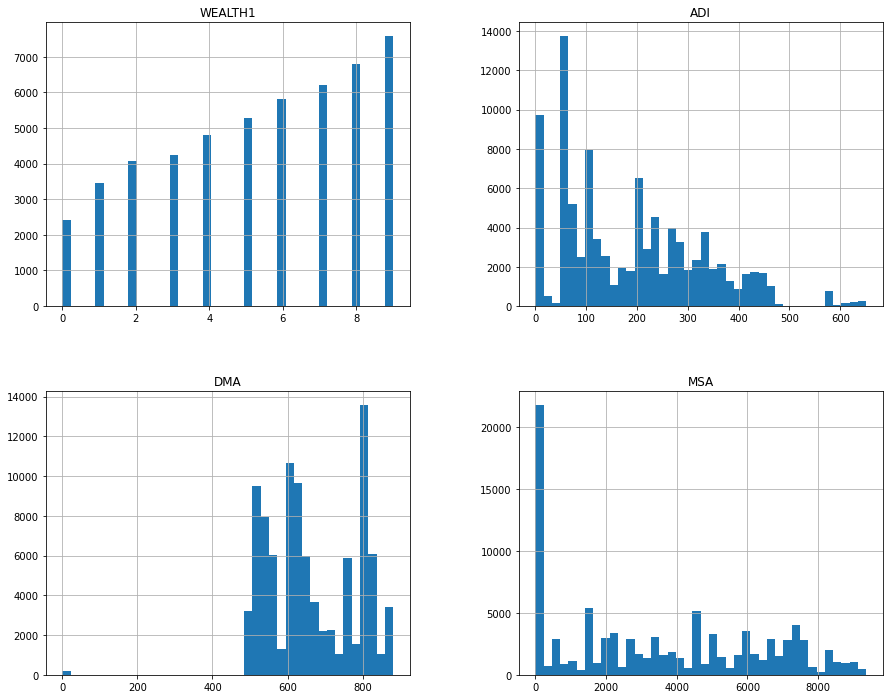

In [32]:
view.hist(figsize=(15,12),bins=40) # checking how well the data distributed before dealing with null values

In [33]:
numericals['WEALTH1'].fillna(method='bfill', inplace=True) # the data is equally distributed and 46% of data has null values, so i decided to replace the null with bfill or ffill
numericals['ADI'].fillna(numericals['ADI'].median(), inplace=True) #0.13% of data has null values, so replacing with mean or median
numericals['DMA'].fillna(numericals['DMA'].mean(), inplace=True)
numericals['MSA'].fillna(numericals['MSA'].median(), inplace=True)

In [34]:
num_nulls = pd.DataFrame(numericals.isna().sum()*100/len(data), columns=['percentage'])
num_nulls.sort_values('percentage', ascending = False)

,percentage
RAMNT_5,99.990567
RDATE_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
...,...
HUPA7,0.000000
HUPA6,0.000000
HUPA5,0.000000
HUPA4,0.000000


In [35]:
#num_nulls=nulls_percentage(numericals)
view_nulls=num_nulls.loc[lst]
view_nulls

,percentage
WEALTH1,0.0
ADI,0.0
DMA,0.0
MSA,0.0


array([[<AxesSubplot: title={'center': 'WEALTH1'}>,
        <AxesSubplot: title={'center': 'ADI'}>],
       [<AxesSubplot: title={'center': 'DMA'}>,
        <AxesSubplot: title={'center': 'MSA'}>]], dtype=object)

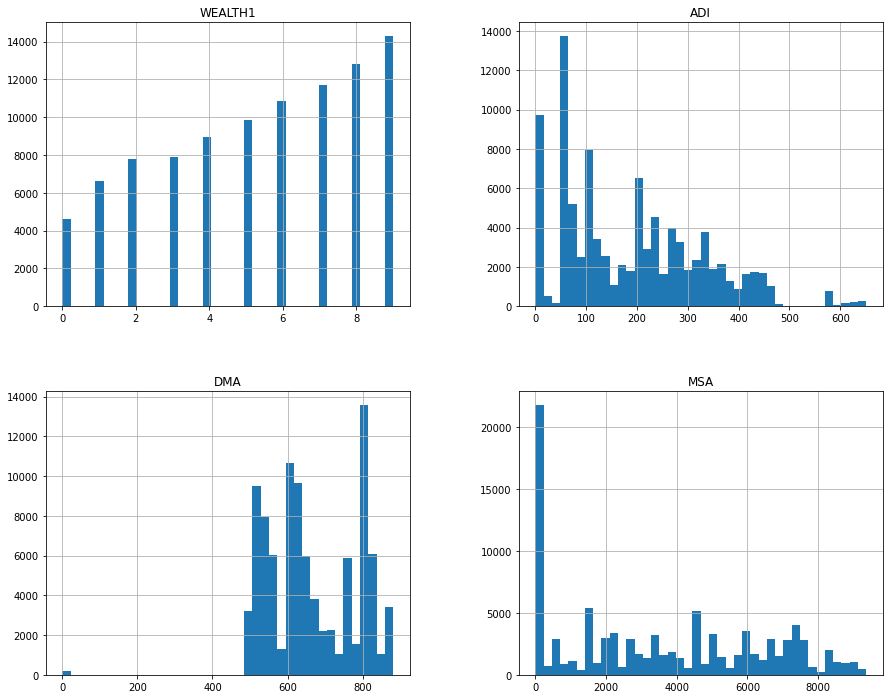

In [36]:
view=numericals[lst]
view.hist(figsize=(15,12),bins=40)